<a href="https://colab.research.google.com/github/Mwikali-5/Churn/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 3 Supervised Learning Project**

# **Assessment Question**

SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn(discontinue their service).
The telecom business is interested in reducing the money lost on customers who do not stay long.

This analysis will determine the features that are most likely to inform when a customer will discontinue their service.

# **Implementation**

# 1. Defining the Question

# a) Specifying the Question

Build a classifier model to predict whether a customer will ("soon") stop doing business with SyriaTel.

# b)Defining the Metric for Success

1. To predict whether a customer will churn (stop their services) or not(continue with the service) with an accuracy of at least 80% and a recall score of 70%

2. To correctly identify the features that can influence whether a customer will churn or not.

# c) Understanding the context

SyriaTel is a telecommunications company and they want to reduce the amount of money spent on retaining customers who do not use their services for a long time. The features given in the dataset will give us more information as to whether a customer will be retained or they will churn. 

SyriaTel is interested in retaining their customers as gaining new customers is expensive and they want to reduce the cost of retaining customers who stay for a short period in time.
It will be detrimental to analyse the features provided to see if a pattern can be identified that will make the current customers stay with the company and come up with conclusive findings that the company can implement to retain their customers for longer periods of time.

# d) Recording the Experimental Design

1. Importing the libraries
2. Reading the data
3. Data Wrangling
4. Exploratory data analysis
5. Data preprocessing
6. Supervised Learning
7. Conclusions
8. Recommendations
9. Follow up questions

# e) Data Description

1. state: the state the customer lives in
2. account length: the number of days the customer has had an account
3. area code: the area code of the customer
4. phone number: the phone number of the customer
5. international plan: true if the customer has the international plan, otherwise false
6. voice mail plan: true if the customer has the voice mail plan, otherwise false
7. number vmail messages: the number of voicemails the customer has sent
8. total day minutes: total number of minutes the customer has been in calls during the day
9. total day calls: total number of calls the user has done during the day
10. total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
11. total eve minutes: total number of minutes the customer has been in calls during the evening
12. total eve calls: total number of calls the customer has done during the evening
13. total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
14. total night minutes: total number of minutes the customer has been in calls during the night
15. total night calls: total number of calls the customer has done during the night
16. total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
17. total intl minutes: total number of minutes the user has been in international calls
18. total intl calls: total number of international calls the customer has done
19. total intl charge: total amount of money the customer was charged by the Telecom company for international calls
20. customer service calls: number of calls the customer has made to customer service
21. churn: true if the customer terminated their contract, otherwise false

#**1.**  **Importing Libraries** 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.figsize":(8, 6)})

#sklearn library
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score,roc_curve, recall_score,precision_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


# **2. Reading the Data**

In [6]:
#Loading the data

data = pd.read_csv("/content/bigml_59c28831336c6604c800002a.csv")

# **Data Exploration**

In [7]:
#Preview of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
#Preview of the tail of the dataset
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [9]:
# Checking number of rows and columns
data.shape

(3333, 21)

In [10]:
# Checking columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# **3. Data Wrangling**

In [11]:
#Checking for anomalies
#iterating through all columns for unique values in the dataset

for i in data.columns:
  #to print a line in between columns
  print('\n')
  print(data[i].unique())



['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200  

In [12]:
#Checking the datatypes

data.dtypes


state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [13]:
#Checking for null values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [14]:
#Checking duplicates
data.duplicated().sum()

0

In [15]:
#Replacing whitespace with '_' to enable uniformity and to eliminate key errors
data.columns = data.columns.str.replace(' ', '_')


# **4. Exploratory Data Analysis**

# **a) Univariate**

In [16]:
#Statistical summary of the dataset
#for numeric data
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
#Statistical summary of the dataset
#for categorical data
data.describe(include = ['object'])

,state,phone_number,international_plan,voice_mail_plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


Looking at the categorical dataset, phone number is really not necessary as it does not add any value to the analysis and will be dropped.

In [18]:
data.drop(['phone_number'], axis = 1, inplace = True)
#confirming if it has been dropped
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# **Area Code**

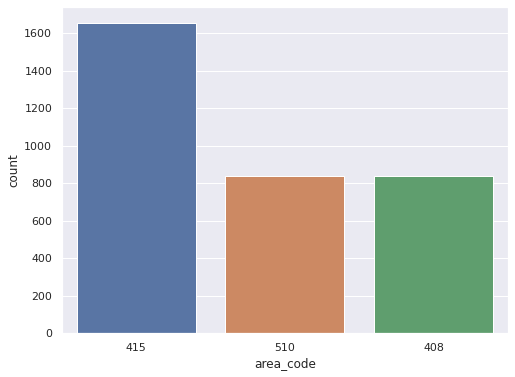

In [19]:
# Histogram showing the distribution of area code
sns.countplot(data=data,x='area_code', order = data.area_code.value_counts().index)

415 is the common area code thus most customers are from this area code.

# **State**

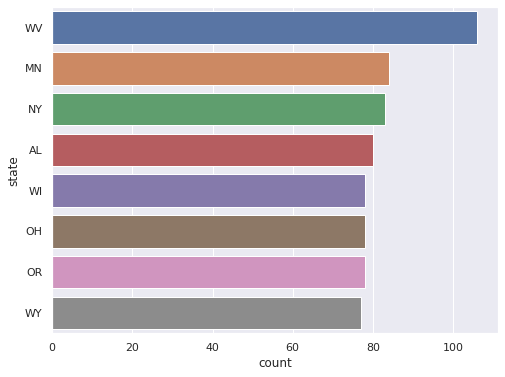

In [20]:
sns.countplot(data=data,y='state', order = data.state.value_counts().iloc[:8].index)

These are the most popular states where the customers from the dataset reside.

# **Voice Mail Plan**

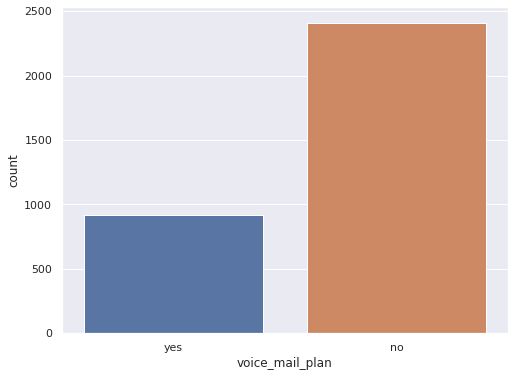

In [21]:
sns.countplot(data=data,x='voice_mail_plan')

Most customers do not have a voice mail plan.

# **Total Day Calls**

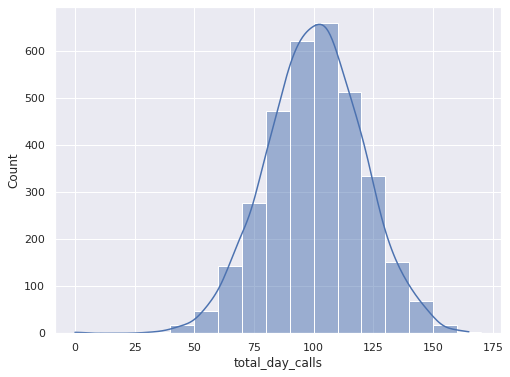

In [22]:
#Histplot showing the distribution of day calls
sns.histplot(data=data,x='total_day_calls', binwidth=10, kde=True)

Majority of people make 100 to 110 calls during the day.


# **Total Evening Calls**

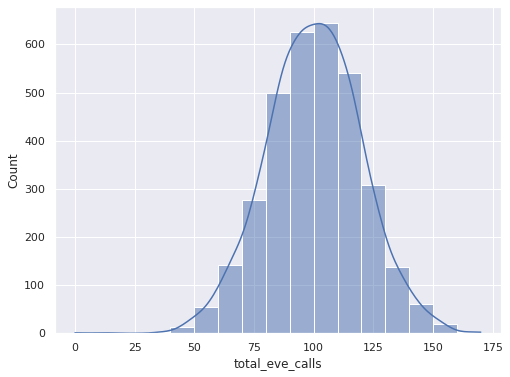

In [23]:
#Histplot showing the distribution of evening calls
sns.histplot(data=data,x='total_eve_calls', binwidth = 10, kde=True)

Majority of people make 100 to 110 calls in the evening, which is almost the same as with day time people.

# **Total Day Charges**

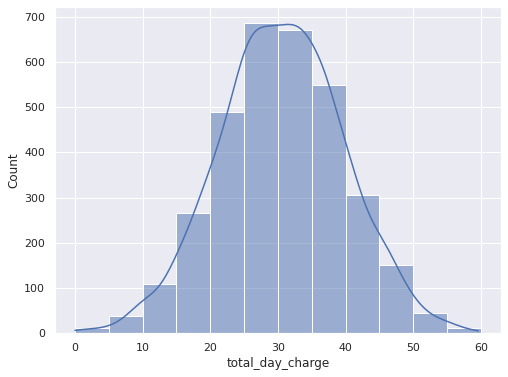

In [24]:
#Distribution of call charges during the day
sns.histplot(data=data,x='total_day_charge', binwidth = 5, kde=True)

Most customers were charged 25 to 30 dollars for calls during the day.

# **Total Night Charges**

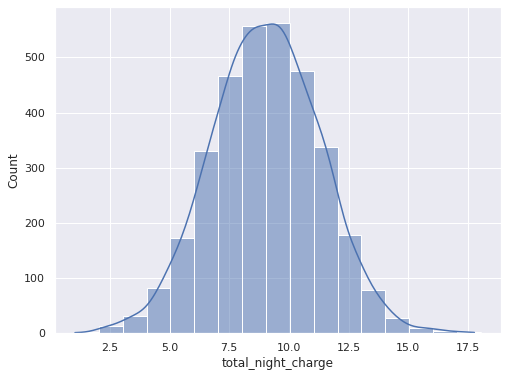

In [25]:
#Distribution of call charges during the night
sns.histplot(data=data,x='total_night_charge', binwidth = 1, kde=True)

Most customers were charged 9 to 10 dollars for calls during the day.

# **Customer Service Calls**

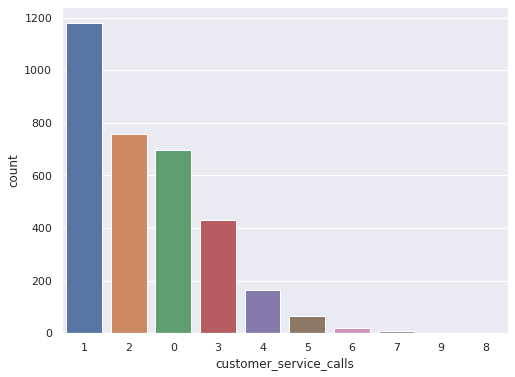

In [26]:
#countplot for customer service calls
sns.countplot(data=data,x='customer_service_calls', order = data.customer_service_calls.value_counts().index)

The number of calls keeps reducing this may mean that the customer was not pleased with the service and discontinued or churned. We will explore this more in bivariate analysis.

# **Churn**

False    2850
True      483
Name: churn, dtype: int64


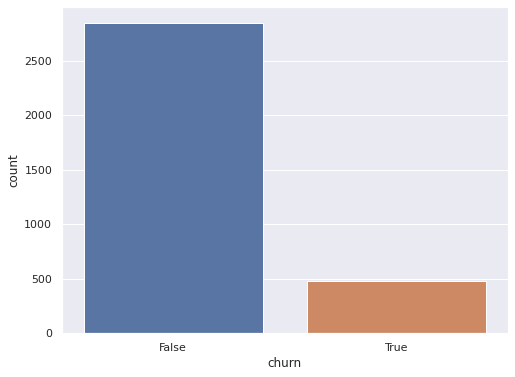

In [27]:
#countplot for churn
sns.countplot(data=data, x ='churn')
print(data['churn'].value_counts())

Most of the customers have not churned or discontinued their service with syria tel. Only 483 have churned.

Note: There is a class imbalance and which will be address in the supervised learning segment.

# **International Plan**

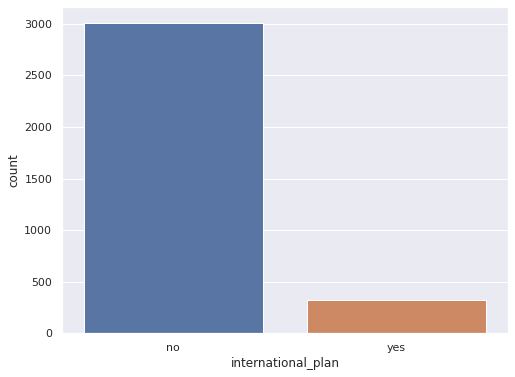

In [28]:
sns.countplot(data=data,x='international_plan')

Majority of the customers do not have an international plan.

# **Account Length**

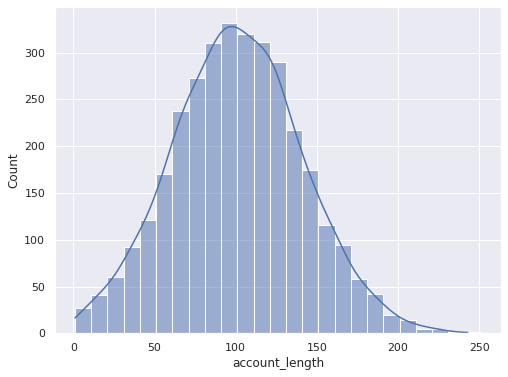

In [29]:
sns.histplot(data=data,x='account_length', binwidth=10, kde=True)

Majority of the customers have had an account for 90 to 100 days

# **b) Bivariate**

In [30]:
# Checking the correlation between numerical variables

correlations = data.corr()
correlations
     

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number_vmail_messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


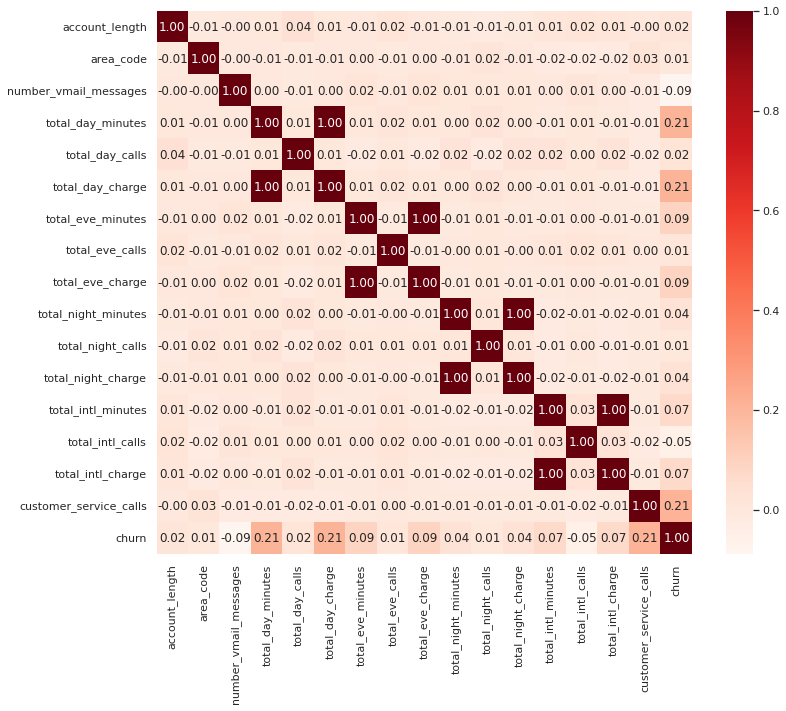

In [31]:
# Creating a correlation heat map for the columns
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

There are some columns that have perfect colinearity with each other of 1


*   Total day minutes and total day charge have a correlation of one and vise versa
*   Total evening charge and total evening minutes have a correlation of one and vise versa


*   Total night charge and total night minutes have a correlation of one and vise versa
*   Total international charge and total international minutes have a correlation of one and vice versa

The columns will be dropped to avoid multicollinearity



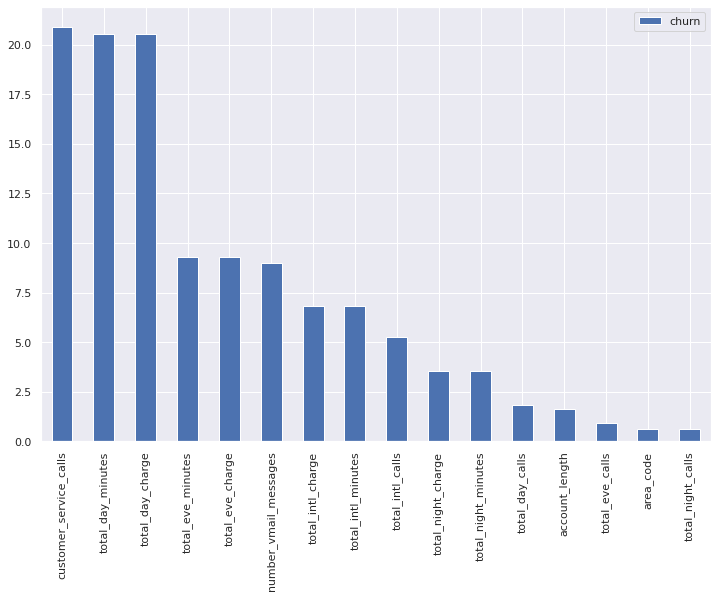

In [32]:
#A plot to show the features most correlated with churn.
pd.DataFrame(abs(data.corr()['churn'].drop('churn')*100).sort_values(ascending=False)).plot.bar(figsize = (12,8))

From the above plot you can see the features that are highly correlated with churn. 
1. The service the customer gets from the customer service can influence if they will churn or not. Bad service will most likely make them discontinue the service while a good service will make them not churn.

2. The charges the customer encounters can make them discontinue the service if they feel they are not getting value for money.

# **What is the relationship between customer service calls and churn?**

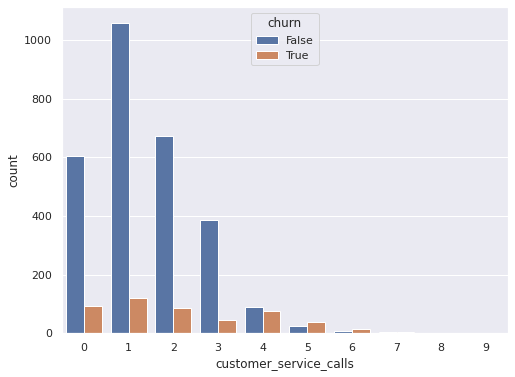

In [33]:
#Relationship between customer service calls and churn
sns.countplot(x='customer_service_calls', hue='churn', data=data)



It can be ascertained from the above graph that as the number of customer service calls increases, the most likely a customer will churn.

# **What is the relationship between international plan and churn?**

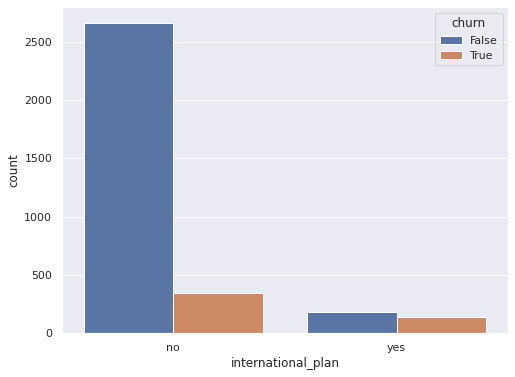

In [34]:
#Relationship between customer service calls and churn
sns.countplot(x='international_plan', hue='churn', data=data)

Most of the people who do not have an international plan are more likely to churn as compared to those that have an international plan. 
The rate of churn is higher in customers with international plan.

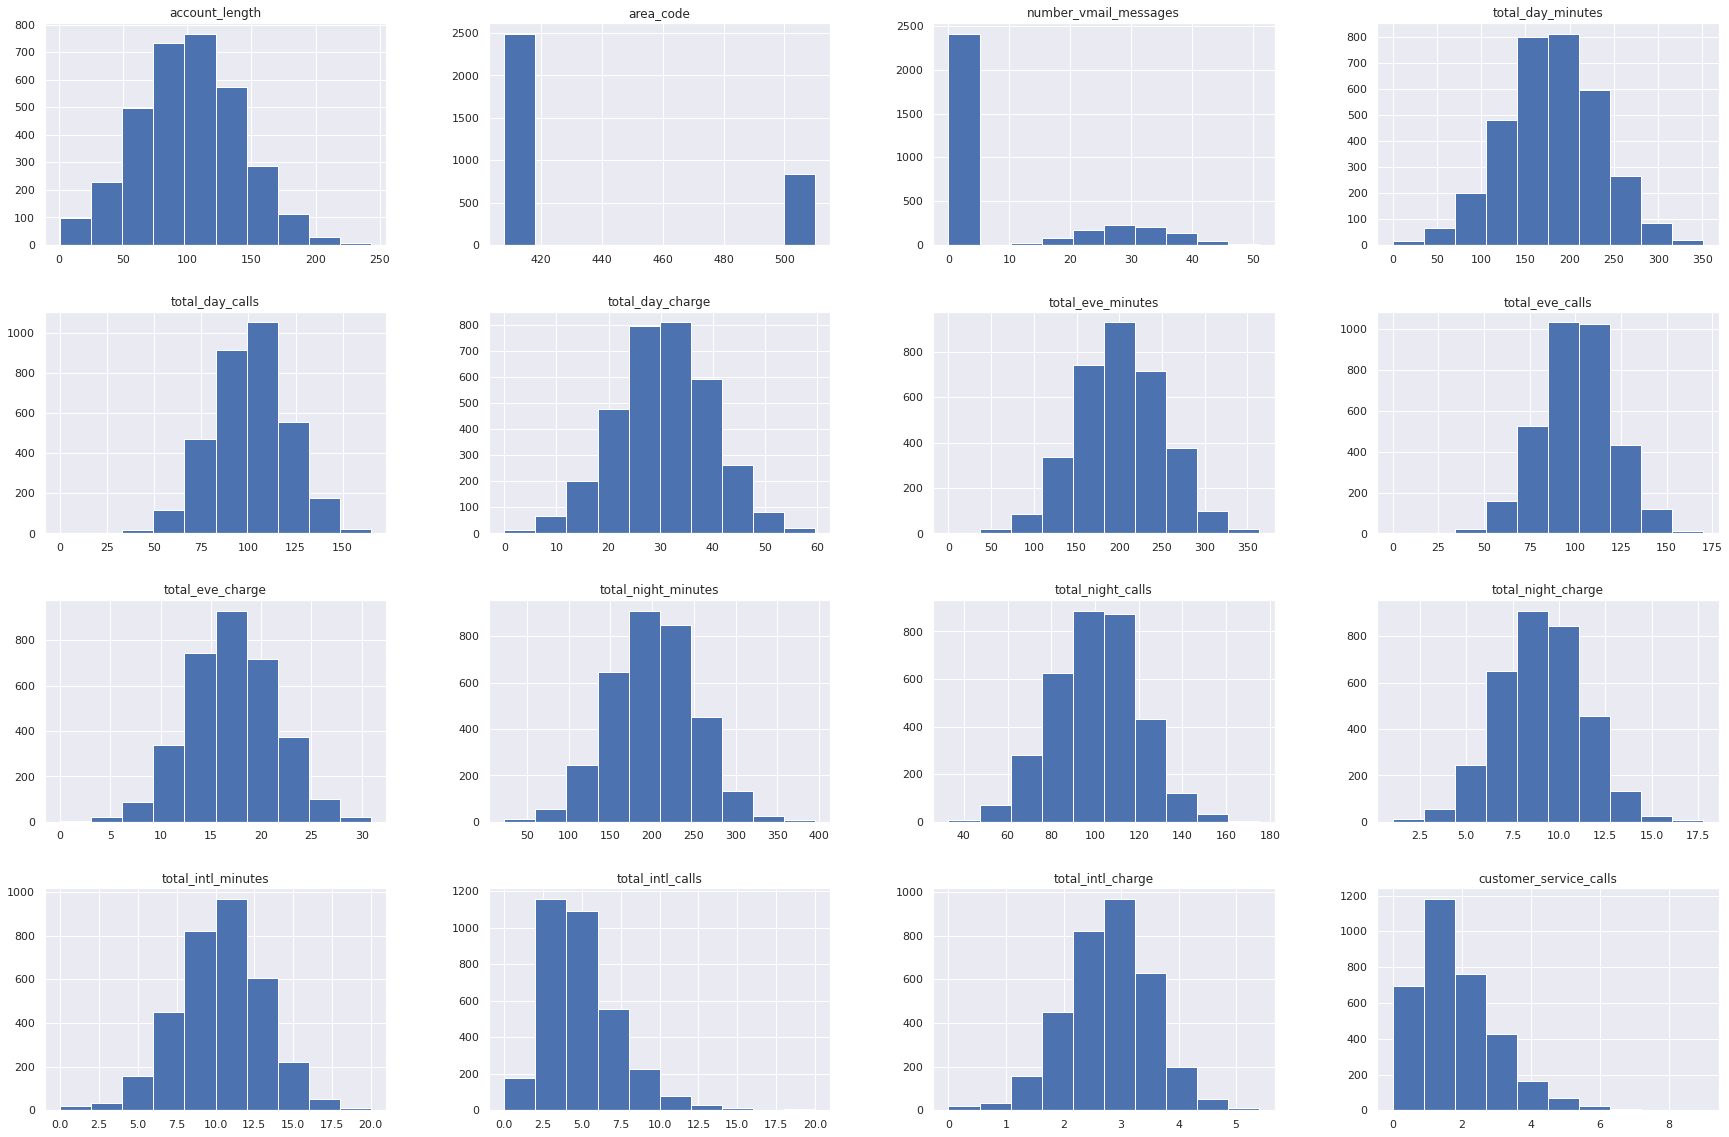

In [35]:
#Distribution_of data
#Checking for Distribution of Data
data.hist(figsize=(30,20))
plt.show();

Most of the features seem to be normally distributed which is good. 
1. Customer service calls is skewed to the left while total international calls is skewed to the right

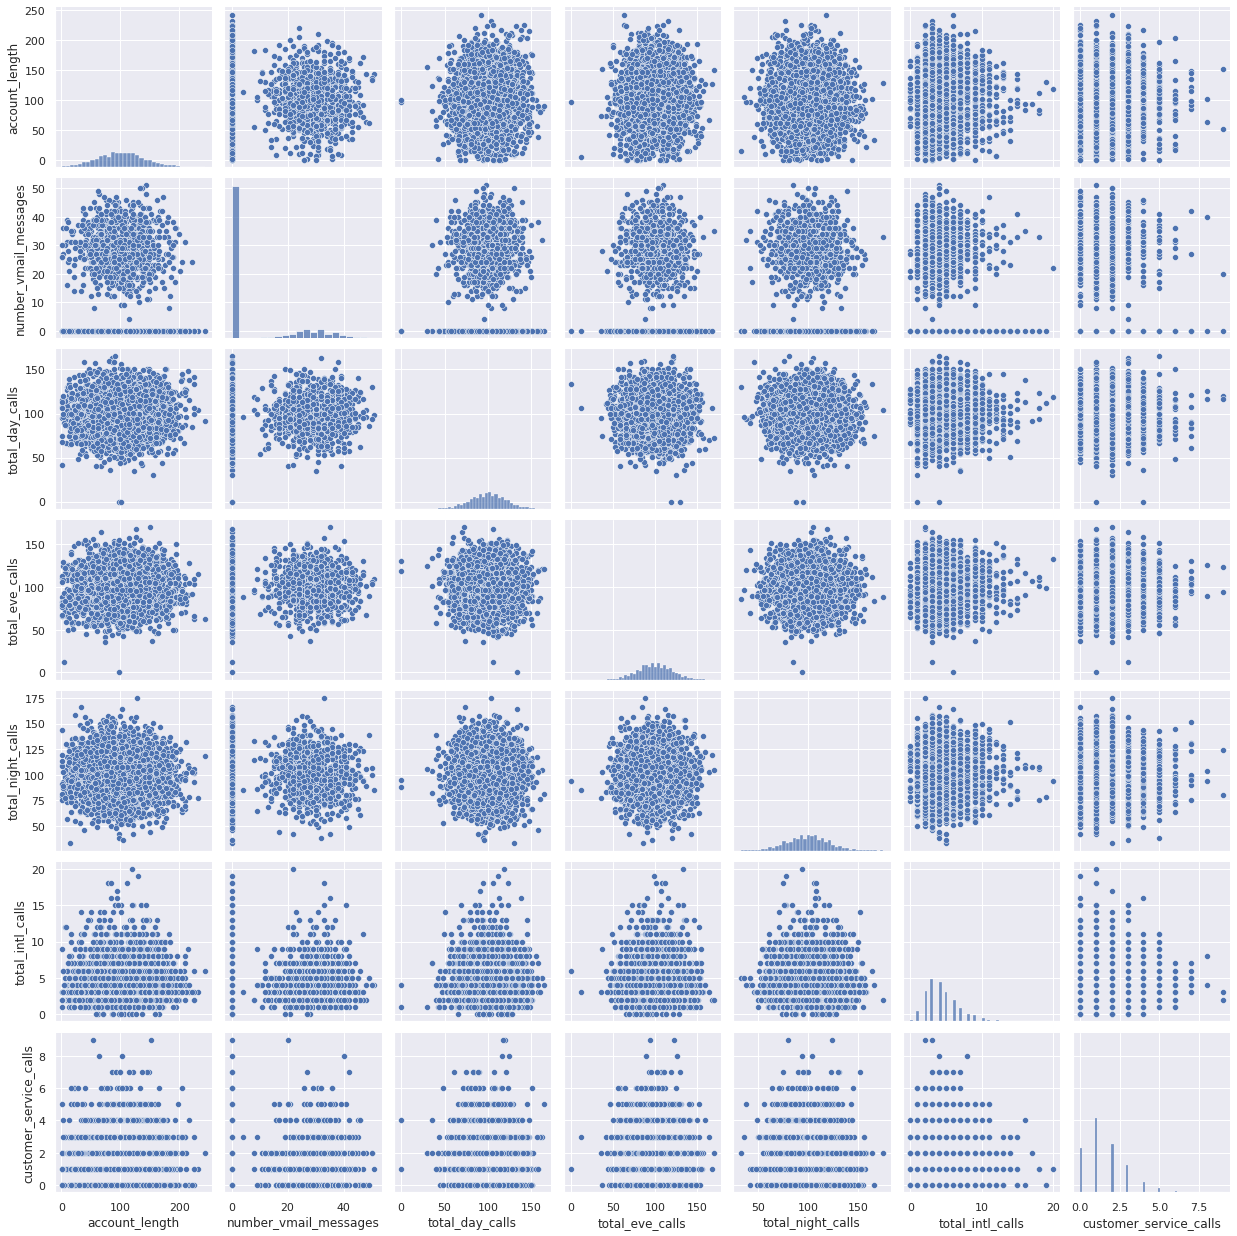

In [36]:
#Creating a pair plot of the numeric data

numeric = data[['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 
                'total_intl_calls', 'customer_service_calls']]
sns.pairplot(numeric)
plt.show();

# **5. Data Preprocessing**

In [37]:
#Make a copy of the data we have cleaned. Incase of any issues one can always revert back to this copy.
df_feature = data.copy()

In [38]:
#dataset for modelling:
df_feature.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [39]:
#Dropping the highly correlated columns
#we will use a threshold of 0.7
corr_matrix = df_feature.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.70)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.70)]

df_feature = df_feature.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(df_feature.shape[1]))

The reduced dataframe has 16 columns.


In [40]:
#Dealing with categorical columns

categoricals = df_feature.select_dtypes("object")

for col in categoricals:
    print(df_feature[col].value_counts(), "\n")

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64 

no     3010
yes     323
Name: international_plan, dtype: int64 

no     2411
yes     922
Name: voice_mail_plan, dtype: int64 



In [41]:
#Converting the binary values to 1 and 0

df_deci = df_feature.replace({ 'yes':1 , 'no': 0}) 
df_deci.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False


In [42]:
#Converting the boolean values to 0 and 1
df_feature['churn'] = df_feature['churn'].map({True: 1, False: 0}).astype('int') 
df_feature.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [43]:
#Using label encoder to convert state labels into numeric form since the number of states are many instead of one hot encoding
#use ordinal encoding for state

encoder = LabelEncoder()
df_deci['state'] = encoder.fit_transform(df_deci['state'])


In [44]:
#Converting area code to dummy variable
cat =pd.get_dummies(df_deci['area_code'], drop_first=True).astype(int)
cat.head()

,415,510
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


In [45]:
#Merge the dummies dataframe to the dataset
df_feature=pd.concat([df_deci, cat], axis=1)

In [46]:
#Dropping the categorical column
df_feature = df_feature.drop('area_code', axis=1)
df_feature

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn,415,510
0,16,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,1,0
1,35,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,1,0
2,31,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,1,0
3,35,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,0,0
4,36,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False,1,0
3329,49,68,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False,1,0
3330,39,28,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False,0,1
3331,6,184,1,0,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False,0,1


In [47]:
#Scaling numerical features

# Instantiate StandardScaler
transformer = StandardScaler()

def scaling(columns):
    return transformer.fit_transform(df_feature[columns].values.reshape(-1,1))

for i in df_feature.select_dtypes(include=[np.number]).columns:
    df_feature[i] = scaling(i)

df_feature.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn,415,510
0,-0.678649,0.676489,-0.327580,1.617086,1.234883,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690,-0.427932,False,1.006925,-0.580468
1,0.603170,0.149065,-0.327580,1.617086,1.307948,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169,-0.427932,False,1.006925,-0.580468
2,0.333313,0.902529,-0.327580,-0.618396,-0.591760,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156,-1.188218,False,1.006925,-0.580468
3,0.603170,-0.428590,3.052685,-0.618396,-0.591760,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401,0.332354,False,-0.993123,-0.580468
4,0.670634,-0.654629,3.052685,-0.618396,-0.591760,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885,1.092641,False,1.006925,-0.580468


In [48]:
#Split data into labels and features
test_features = ['state', 'account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
                 'total_day_charge', 'total_eve_calls', 'total_eve_charge', 'total_night_calls', 'total_night_charge', 
                 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 415, 510]
                 
#Selecting the features
X = df_feature[test_features].values

#Selecting the labels
y = df_feature.churn.astype(int)   #to avoid this: ValueError: Unknown label type: 'continuous'
y = y.values

In [49]:
#Split into train and test set
#Using the 80 - 20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **6. Supervised Learning**

In this section, various models will be built and evaluation metric will be implemented to gauge the predictions made. 

A baseline model will be the first model implemented and then other models will be built to see if they make better predictions as compared to the baseline model.

For this project, the recall score will be detrimental since the aim is to correctly classify if a customer will churn or not and eliminating false negatives will be better. A customer cancelling and it being overlooked will not help the business since the business wants to retain the customers they currently have.


**At minimum three models must be built:**
1. Simple baseline model, in this case I will choose logistic regression
2. A complex model....random forest and XGBoost
3. Different model hyperparameters, so this means a grid search

# **1) Baseline Model: Logistic Regression**

In [50]:
from sklearn import metrics

In [51]:
#instantiate the model
model = LogisticRegression()

#since we saw that churn had a class imbalance, we will address it by using SMOTE which will balance the class by creating new synthetic data
sm = SMOTE(random_state = 42, sampling_strategy=0.28)
#Fit and transform X_train and y_train using sm
X_t_oversampled, y_t_oversampled = sm.fit_resample(X_train, y_train)


#fit the model and train it on the training set
model.fit(X_t_oversampled, y_t_oversampled)

#predict based on the model we have trained
y_pred_train = model.predict(X_t_oversampled)
y_pred_test = model.predict(X_test)

#using cross validation to evaluate the fitted model

cv_scores = cross_val_score(model, X_t_oversampled, y_t_oversampled, cv=3)
cv_scores

print(f"The model accuracy is {cv_scores.mean()} ")

The model accuracy is 0.8036220361887714 


In [52]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_test))

[[545  21]
 [ 71  30]]


In [54]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       566
           1       0.59      0.30      0.39       101

    accuracy                           0.86       667
   macro avg       0.74      0.63      0.66       667
weighted avg       0.84      0.86      0.84       667



# ***NOTE***

**1. Precision: Percentage of correct positive predictions relative to total positive predictions.**

**2. Recall: Percentage of correct positive predictions relative to total actual positives.** 

The train accuracy from above is 80% while for the test is 86%, this is a good range thus the models are not overfitted.

1. A precision score of 59%, which means that out of all the customers that the model predicted would churn only 59% of them actually did.

2. A recall of 30% means that out of all the customers that actually did churn, the model only predicted this outcome correctly for 30%. This is a low score.

3. The model has an accuracy of 86% which is a really good score.
4. The model has an F1 score of 39% which means the model will be accurate less than half the time it makes a prediction and this is really not good.
5. The model overall performs very well for the majority class which is the customers who did not churn and for this project the minority class is the most crucial since the business wants to retain them.



1) a) Hyperparameter Tuning:

Different hyperparameters can be added to optimize the model and attempt to improve the metrics of the model.

Can using different hyperparameters tune the model to perform better? 
1. Solver: this is the algorithm which will be used in the optimization problem.
2. Regularization: used to reduce model generalization error and attempts to regulate overfitting.
3. C: works with regularization or penalty to reduce overfitting. It controls the penalty strength

In [ ]:
log_param = {
    'C':[100, 10, 1.0, 0.1, 0.01],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1']
}
#Instantiate GridSearchCv
log_param_search = GridSearchCV(model, log_param, cv=3, scoring = 'accuracy')

#fit to the data
log_param_search.fit(X_t_oversampled, y_t_oversampled)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [ ]:
# Getting the best parameters
log_param_search.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Modelling with the tuned hyperparameters
model_tuned = LogisticRegression(C=0.1, solver='liblinear', penalty='l1')
print("Model Performance:\n")
model_tuned.fit(X_t_oversampled, y_t_oversampled)


print(f"Test Accuracy: {accuracy_score(y_test,y_pred_test)}")
print(f'F1 score for testing set: ',round(f1_score(y_test,y_pred_test),5))

Model Performance:

Test Accuracy: 0.8620689655172413
F1 score for testing set:  0.39474


Model did not change that much even with the inclusion of hyperparameters. The logistic regression was the base model. Better results may be achieved by using other classification models. 

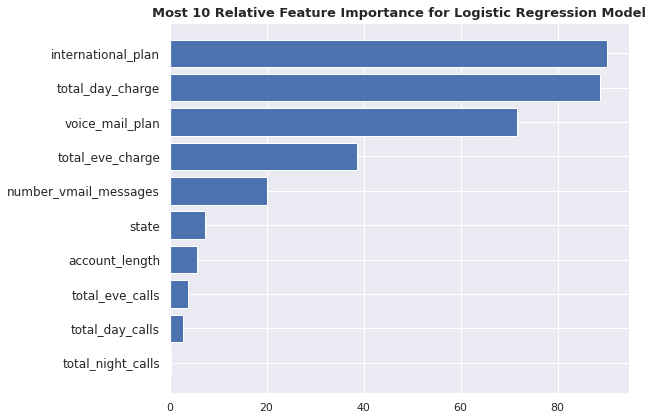

In [ ]:
# Feature Importances
feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(test_features)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

The top three most important features for the logistic regression model are:
1. internationa plan
2. total day charge 
3. voice mail plan.

# **2) Decision Trees**

In [ ]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_t_oversampled, y_t_oversampled)

# Predict based on the model we've trained
y_pred_tree = tree.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))


Accuracy: 0.904047976011994


The accuracy increased from 86% to 90%, the second model is doing well overall.

In [ ]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_tree))

[[529  37]
 [ 27  74]]


In [ ]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       566
           1       0.67      0.73      0.70       101

    accuracy                           0.90       667
   macro avg       0.81      0.83      0.82       667
weighted avg       0.91      0.90      0.91       667



1. We have a precision score of 67%, which means that out of all the customers that the model predicted would churn only 67% of them actually did.

2. A recall of 73% means that out of all the customers that actually did churn, the model only predicted this outcome correctly for 73% of them which is an improvement from our base model

3. The model has an accuracy of 90% which is a really good score.
4. The model has an F1 score of 70% which means the model will be accurate 70% of the time it makes a prediction which is a good improvement from our baseline model.
5. The model overall performs very well for both classes and it is evident that the predictions for the minority class have improved greatly hence the business can safely pinpoint the features that need to be focused on so that the customers do not churn.


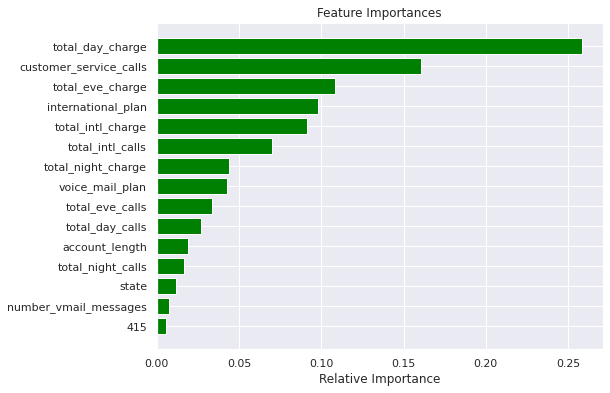

In [ ]:
#feature importance
feature_names = list(test_features)
importances = tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the decision tree classifier model, the top most important features are:
1. total_day_charge
2. customer_service_calls
3. total_eve_charge

These are the features that can be used to determine if a customer will churn. High charges will deter customers from continuing their services. 
Bad customer service will likely lead to a high churn rate.

# **3) KNN**

In [ ]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(X_t_oversampled, y_t_oversampled)

# Predict on the test set
pred_clf = clf.predict(X_test)

print("Testing Accuracy: {}".format(accuracy_score(y_test, pred_clf)))


Testing Accuracy: 0.856071964017991


The accuracy score has reduced from the previous model which had 90% to 86%.

In [ ]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, pred_clf))

[[528  38]
 [ 58  43]]


In [ ]:
# Getting the classification report
print(metrics.classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       566
           1       0.53      0.43      0.47       101

    accuracy                           0.86       667
   macro avg       0.72      0.68      0.69       667
weighted avg       0.84      0.86      0.85       667



1. We have a precision score of 53%, which means that out of all the customers that the model predicted would churn only 53% of them actually did.

2. A recall of 43% means that out of all the customers that actually did churn, the model only predicted this outcome correctly for 43% of them which is an improvement from our base model

3. The model has an accuracy of 86% which is a really good score.
4. The model has an F1 score of 47% which means the model will be accurate less than half the time it makes a prediction which is not that good.
5. The model overall performs not so great as compared to the second model. Hyperparameter tuning may change the results.

KNN does not have the feature importance attribute.

# **4)Random Forest**

In [ ]:
# Fitting RF classifier to the Training set
rand_forest = RandomForestClassifier()

# Train it on our training set.
rand_forest.fit(X_t_oversampled, y_t_oversampled)

# Predict based on the model we've trained
y_pred_rand = rand_forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rand))


Accuracy: 0.9550224887556222


The accuracy has improved to 96%

In [ ]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_rand))

[[562   4]
 [ 26  75]]


In [ ]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred_rand))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.95      0.74      0.83       101

    accuracy                           0.96       667
   macro avg       0.95      0.87      0.90       667
weighted avg       0.95      0.96      0.95       667



1. We have a precision score of 95%, which means that out of all the customers that the model predicted would churn only 95% of them actually did. This is a very good prediction

2. A recall of 74% means that out of all the customers that actually did churn, the model only predicted this outcome correctly for 74% of them which is an improvement from our base model

3. The model has an accuracy of 96% which is the best score thus far.
4. The model has an F1 score of 83% which means the model will be accurate 83% of the time it makes a prediction.
5. The model overall performs very well for both classes and it is evident that the predictions for the minority class have improved greatly hence the business can safely pinpoint the features that need to be focused on so that the customers do not churn.

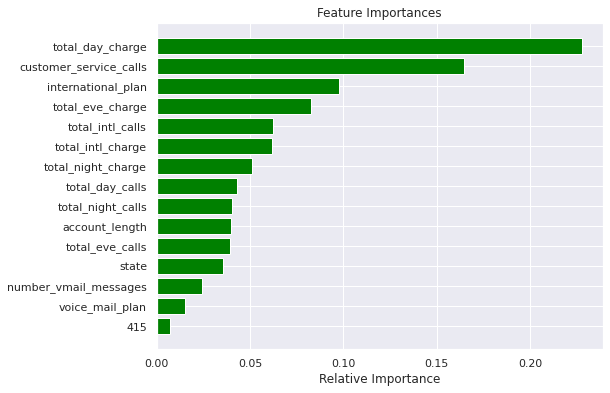

In [ ]:
#feature importance
feature_names = list(test_features)
importances = rand_forest.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the random forest classifier model, the top most important features are:
1. total_day_charge
2. customer_service_calls
3. international_plan

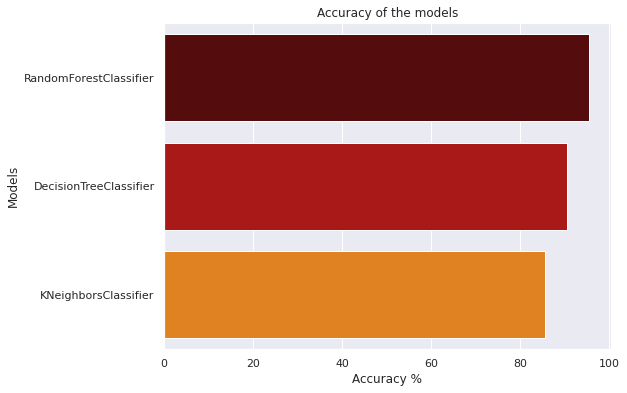

In [ ]:
#Comapring the models accuracy
models = [model,tree,clf,rand_forest]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="gist_heat")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models');

Random Classifier is the model with the best accuracy score.

In [ ]:
#Displaying the accuracy results of the models
results

,Models,Accuracy
0,RandomForestClassifier,95.502249
0,DecisionTreeClassifier,90.404798
0,KNeighborsClassifier,85.607196
0,RandomForestClassifier,95.502249


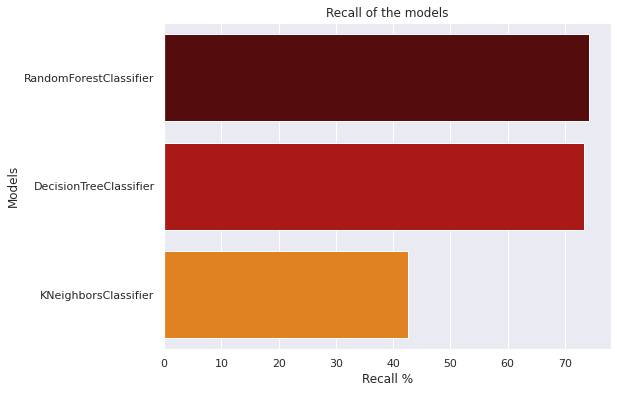

In [ ]:
#Comparing the models recall score

#Comapring the models accuracy
models = [model,tree,clf,rand_forest]

result = []
results = pd.DataFrame(columns= ["Models","Recall"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)    
    result = pd.DataFrame([[names, recall*100]], columns= ["Models","Recall"])
    results = results.append(result)
    
    
sns.barplot(x= 'Recall', y = 'Models', data=results, palette="gist_heat")
plt.xlabel('Recall %')
plt.title('Recall of the models');

Random Classifier is the model with the highest recall score.

Random Classifier is the model with the best accuracy score and recall score thus will be the model that gives the most accurate predictions out of the four that had been modelled. It will be the final model that will be tuned for optimization.

## **Hyper parameter Tuning**

In [58]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [2,5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100],
    'criterion':['entropy', 'gini']}

In [59]:
# Creating the grid for tuning
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid= param_grid, refit = True, verbose=2, cv=5 )

In [60]:
# Fitting the hyperparameter grid to the train set
grid.fit(X_t_oversampled,y_t_oversampled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True], 'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 20], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [ ]:
# Getting the best parameters
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
# Showing the best estimators for the grid search CV
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       n_estimators=50, random_state=0)

In [ ]:
# Getting the predictions
y_pred_optimized = grid.predict(X_test)

In [ ]:
# Getting the confusion metrics
print(metrics.confusion_matrix(y_test, y_pred_optimized))

[[556  10]
 [ 25  76]]


In [ ]:
# Getting the classifiction report
print(metrics.classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.88      0.75      0.81       101

    accuracy                           0.95       667
   macro avg       0.92      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667



The optimized random forest has not changed that much from the one before. 
1. The precision score has reduced from 91% to 88%.
2. The recall score has increased from 72% to 75%, the business can better predict those who did churn and find out why in order to retain them.
3. The model's accuracy is 95 just like the previous one.



In [ ]:
#feature importance

importances = grid.best_estimator_.feature_importances_
importances


array([0.03910228, 0.04195367, 0.09142429, 0.01431431, 0.02813897,
       0.0410022 , 0.22147463, 0.03659285, 0.08837892, 0.04221557,
       0.05890687, 0.06153528, 0.06816708, 0.15212916, 0.00847942,
       0.00618449])

In [ ]:
#tying the feature importance values to column names
hd = list(test_features)
for i, f in zip(hd, grid.best_estimator_.feature_importances_):
     print(i,round(f*100,2))

state 3.91
account_length 4.2
international_plan 9.14
voice_mail_plan 1.43
number_vmail_messages 2.81
total_day_calls 4.1
total_day_charge 22.15
total_eve_calls 3.66
total_eve_charge 8.84
total_night_calls 4.22
total_night_charge 5.89
total_intl_calls 6.15
total_intl_charge 6.82
customer_service_calls 15.21
415 0.85
510 0.62


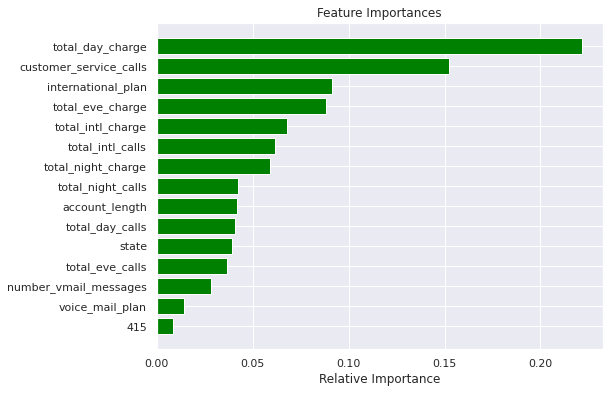

In [ ]:
#feature importance
feature_names = hd
importances = grid.best_estimator_.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the optimized random forest classifier model, the top most important features are:
1. total_day_charge
2. customer_service_calls
3. international_plan

A pattern is starting to emerge with the top three features. They are the same. That means that high charges and more calls to customer service leads to a high churn rate.

# **5)Adaboost and Gradient boost**

In [55]:
# Fitting AdaBoost classifier to the Training set
Ada = AdaBoostClassifier(random_state=0)
Ada.fit(X_t_oversampled, y_t_oversampled)

# Fitting Gradient Boosting classifier to the Training set
GB = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
GB.fit(X_t_oversampled, y_t_oversampled)
     

GradientBoostingClassifier(random_state=0)

In [56]:
# Getting the predicted values
y_pred_AdB = Ada.predict(X_test)
y_pred_GBM = GB.predict(X_test)
     

In [57]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_optimized))
print("Accuracy Ada Boost:",metrics.accuracy_score(y_test, y_pred_AdB))
print("Accuracy Gradient Boost:",metrics.accuracy_score(y_test, y_pred_GBM))

NameError: ignored

Random Forest Classifier and Gradient Boost both have an accuracy score of 95%.

In [ ]:
# Model confusion matrix , how often is the classifier correct?
print("Confusion matrix RF:"'\n',metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix Ada Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_AdB))
print("Confusion matrix Gradient Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_GBM))

Confusion matrix RF:
 [[562   4]
 [ 26  75]]
Confusion matrix Ada Boost:
 [[540  26]
 [ 52  49]]
Confusion matrix Gradient Boost:
 [[557   9]
 [ 22  79]]


Accuracy for those who churned is better in Gradient Boost and Random Forest than the Ada Boost model.

In [ ]:
# Model classification_report matrix , how often is the classifier correct?
print("Confusion matrix RF:"'\n',metrics.classification_report(y_test, y_pred_optimized))
print("Confusion matrix Ada Boost:"'\n',metrics.classification_report(y_test, y_pred_AdB))
print("Confusion matrix Gradient Boost:"'\n',metrics.classification_report(y_test, y_pred_GBM))

Confusion matrix RF:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.88      0.75      0.81       101

    accuracy                           0.95       667
   macro avg       0.92      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667

Confusion matrix Ada Boost:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       566
           1       0.65      0.49      0.56       101

    accuracy                           0.88       667
   macro avg       0.78      0.72      0.74       667
weighted avg       0.87      0.88      0.88       667

Confusion matrix Gradient Boost:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.90      0.78      0.84       101

    accuracy                           0.95       667
   macro avg       0.93      0.88      0.90

The recall score is highest in Gradient Boost than any other model hence it is the best model for the business to classify properly who did churn and discontinued their services.
The graph below shows this.

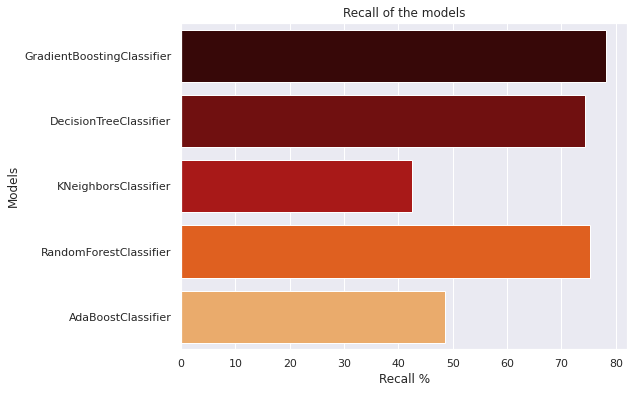

In [ ]:
#Comparing the models recall score

models = [model,tree,clf,rand_forest, Ada, GB]

result = []
results = pd.DataFrame(columns= ["Models","Recall"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)    
    result = pd.DataFrame([[names, recall*100]], columns= ["Models","Recall"])
    results = results.append(result)
    
    
sns.barplot(x= 'Recall', y = 'Models', data=results, palette="gist_heat")
plt.xlabel('Recall %')
plt.title('Recall of the models');

In [ ]:
#Displaying the recall score for all the models
results

,Models,Recall
0,GradientBoostingClassifier,78.217822
0,DecisionTreeClassifier,74.257426
0,KNeighborsClassifier,42.574257
0,RandomForestClassifier,75.247525
0,AdaBoostClassifier,48.514851
0,GradientBoostingClassifier,78.217822


In [ ]:
# Getting the important features
Important_features  = GB.feature_importances_

In [ ]:
# Creating a dataframe of feature names and features importances
FIM = pd.DataFrame({'Features': test_features 
                   , 'Feature_importance':Important_features})
FIM = FIM.sort_values(by=['Feature_importance'],ascending=False)
FIM

,Features,Feature_importance
6,total_day_charge,0.289000
13,customer_service_calls,0.200825
2,international_plan,0.192030
8,total_eve_charge,0.095055
11,total_intl_calls,0.066063
4,number_vmail_messages,0.046887
12,total_intl_charge,0.040240
3,voice_mail_plan,0.021451
10,total_night_charge,0.019991
0,state,0.009338


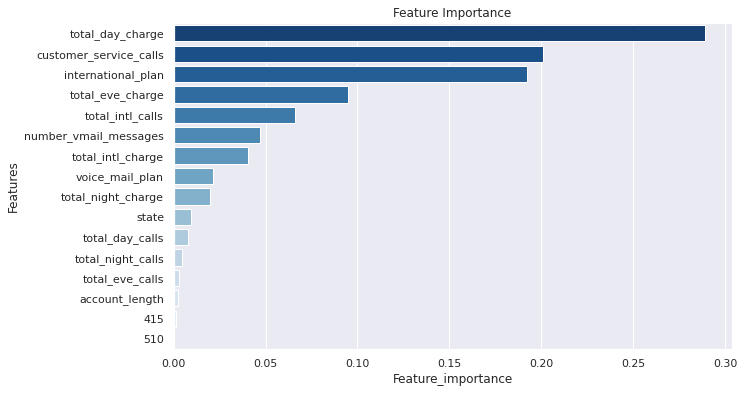

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM, palette="Blues_r")
plt.show()

For the gradient boost model, the top most important features are:
1. total_day_charge
2. customer_service_calls
3. international_plan

The same pattern is also seen here which means these three features are important in determining if a customer will churn or not.

# **Evaluation of Gradient Boost Model**

For the final model, the recall score is the most important score. A high recall score is preferred and the Gradient Boost Classifier achieved this with a recall score of 78%. Elimination of false negatives is most important for this project since the business wants to retain their customers.
A customer discontinuing their services and it being overlooked is detrimental to the business.
The accuracy score is also high which means that our model is performing very well.

# **7. Conclusion**



*   The initial goal of achieving 80% accuracy is achieved by all the models that were fitted.
*   Gradient Boost Classifier model provides the highest recall score of all the models of 78%


*   Customer service calls, international plan, total day charges are the features with the greatest importance.






# **8. Recommendations**

1. The number of calls the customer makes to customer service should be reduced to two. If the customer calls once, the customer service agent should do a follow up to ensure the customer's issue has been fully resolved to avoid making the customer call back again.

2. The customer service agents should be trained on how to treat, escalate and solve issues as soon as possible.

3. The phone charges are high hence a high churn rate, the business should consider having payment plans for different customers so that one is charged according to the service they consume.

4. The business should consider lowering or giving discounts for customers who have an international plan and also charge them per the service they use.

# **9. Follow up questions**

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the right data?
Yes the data was correct and verified

b). Do we need other data to answer our question?
Yes, it would be effective if we had the area code and state names expounded more to give more information since it was vague and one could not pin point it exactly.

c). Did we have the right question?
The question chosen was correct 